# Serialization and Deserialization of Diamonds Dataset

Dataset - diamonds.csv

# About Dataset
1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 

# Objective 
Objective of this project is to predict the diamond price.💎
by using KNN code ehich is implemented from scratch and then compare this o/p with sklearn knn implementation o/p

# steps to be followed:
Step - 1: Load the data

Step - 2: Perform the EDA on the given dataset

Step - 3: Handle Categorical Columns i.e. convert them to numerical representation (TODO - Wisely choose between LabelEncoding and OneHotEncoding)

Step - 4: Normalize the data

Step - 5: Split the data - Test and Train (recommended 75:25 split)

Step - 6: Build KNN Algorithm from scratch and do the predictions for test data. You should not use the sklearn KNN algorithm here. Write the complete code implementation on KNN.

Step - 7: Evaluate your model

Step - 8: Train a model using sklearn KNN Algorithm and compare the results with your scratch implementation

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Check size of dataset

In [4]:
df.shape

(53940, 10)

# Check the Columns of dataset

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# Check Unique values

In [6]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

#Check for Null values

In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

we see that there are no null values in the dataset

# Check the datatypes of the attributes

In [8]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

# Summarize or Describe entire dataset

In [9]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# UNIVARIATE ANALYSIS

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

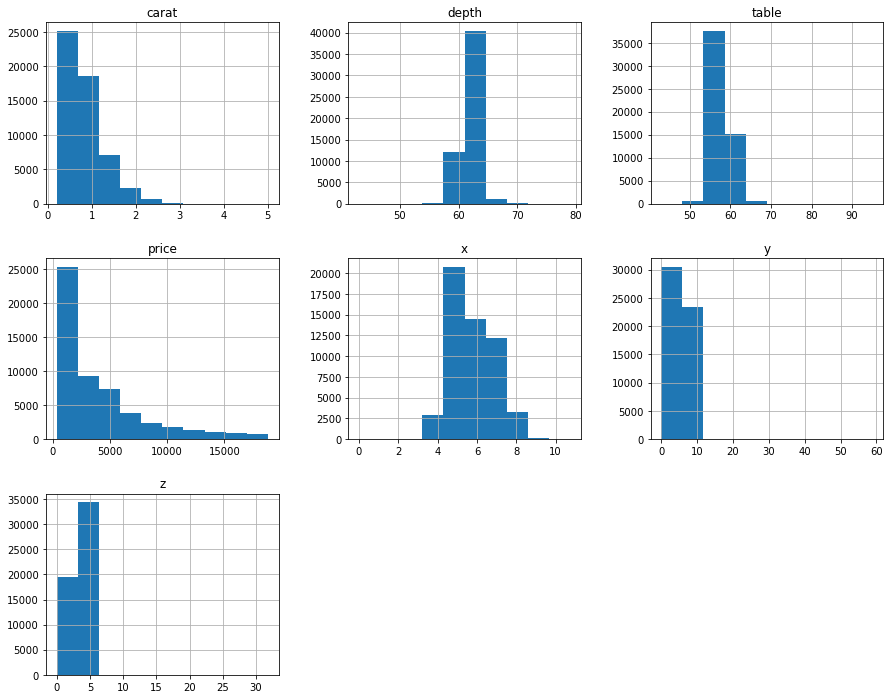

In [11]:
df.hist(figsize=(15,12))

# Box Plot for numerical attributes to understand outliers

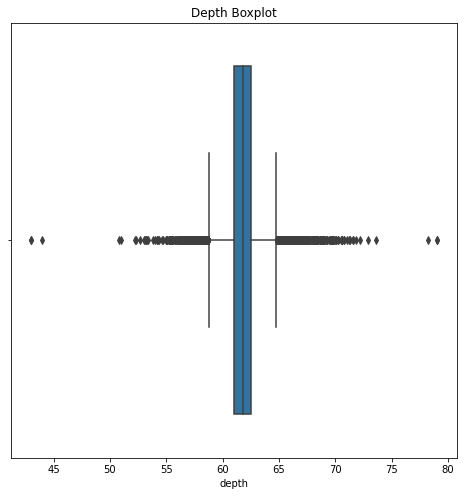

In [12]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.depth)
plt.title('Depth Boxplot')
plt.show()

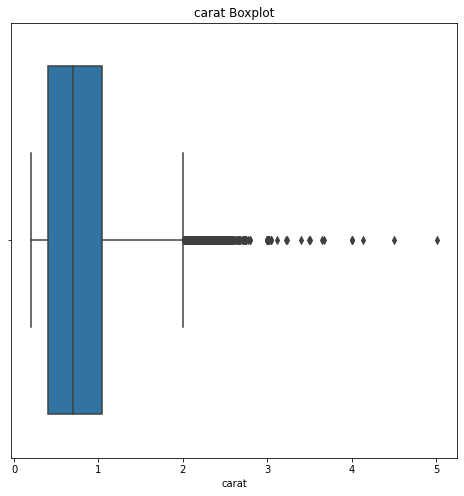

In [13]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.carat)
plt.title('carat Boxplot')
plt.show()

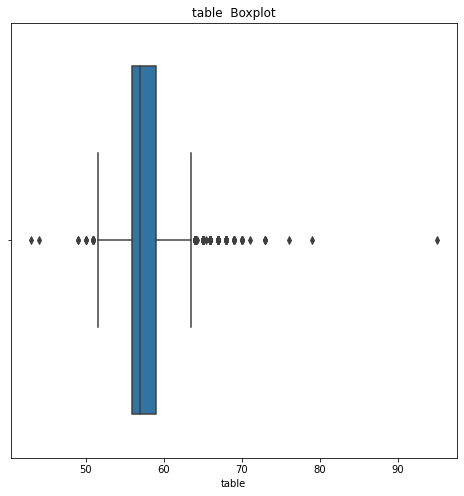

In [14]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.table)
plt.title('table  Boxplot')
plt.show()

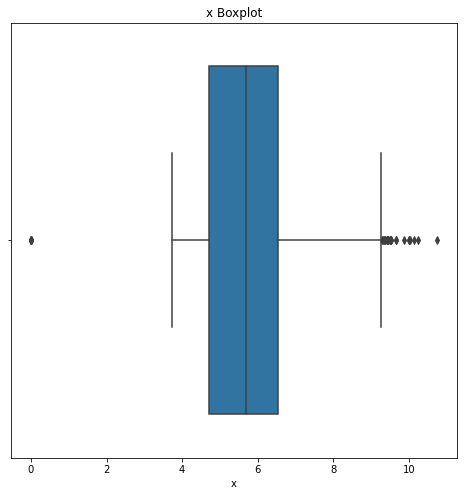

In [15]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.x)
plt.title('x Boxplot')
plt.show()

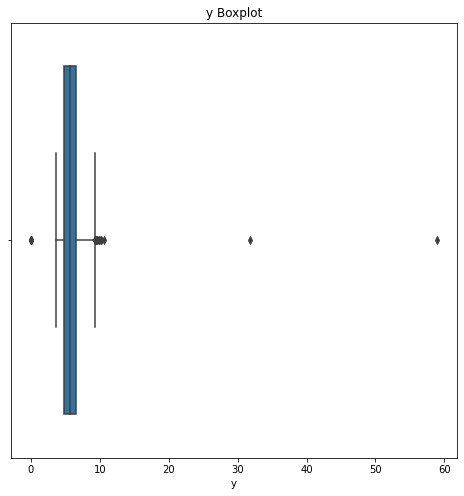

In [16]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.y)
plt.title('y Boxplot')
plt.show()

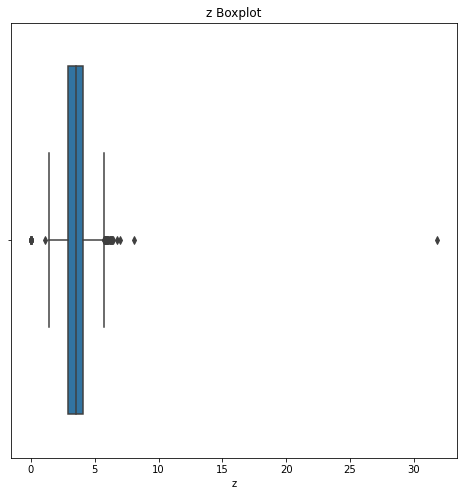

In [17]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(df.z)
plt.title('z Boxplot')
plt.show()

#Box Plot for categorical variables
#Diamond Cut vs Price


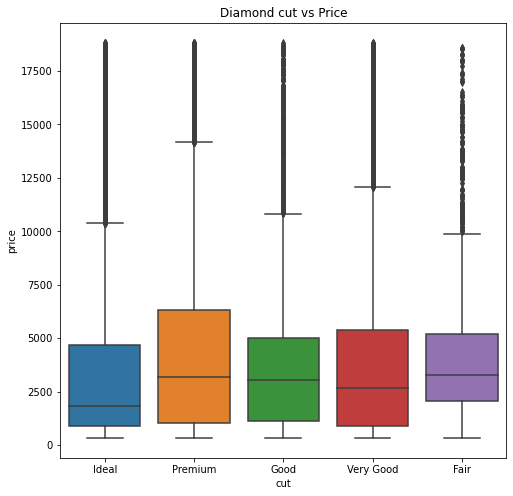

In [18]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df.price,x=df.cut)
plt.title("Diamond cut vs Price")
plt.show()

# Diamond color vs Price

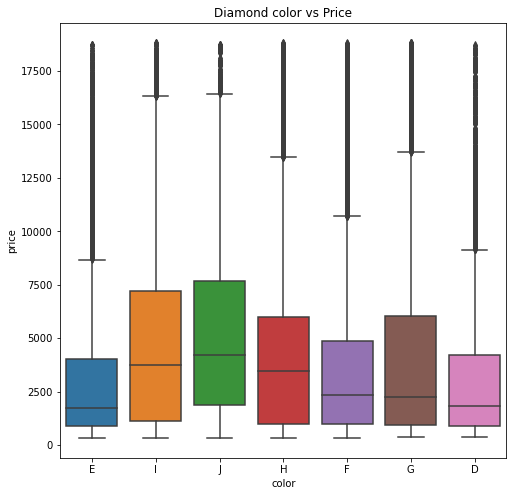

In [19]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df.price,x=df.color)
plt.title("Diamond color vs Price")
plt.show()

# Diamond clarity vs Price

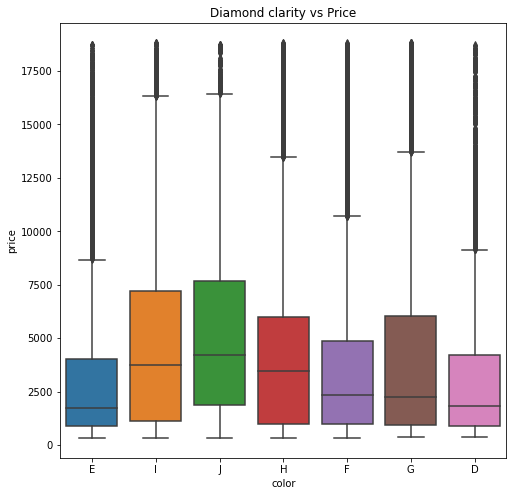

In [20]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df.price,x=df.color)
plt.title("Diamond clarity vs Price")
plt.show()

# Correlation Plot

<AxesSubplot:>

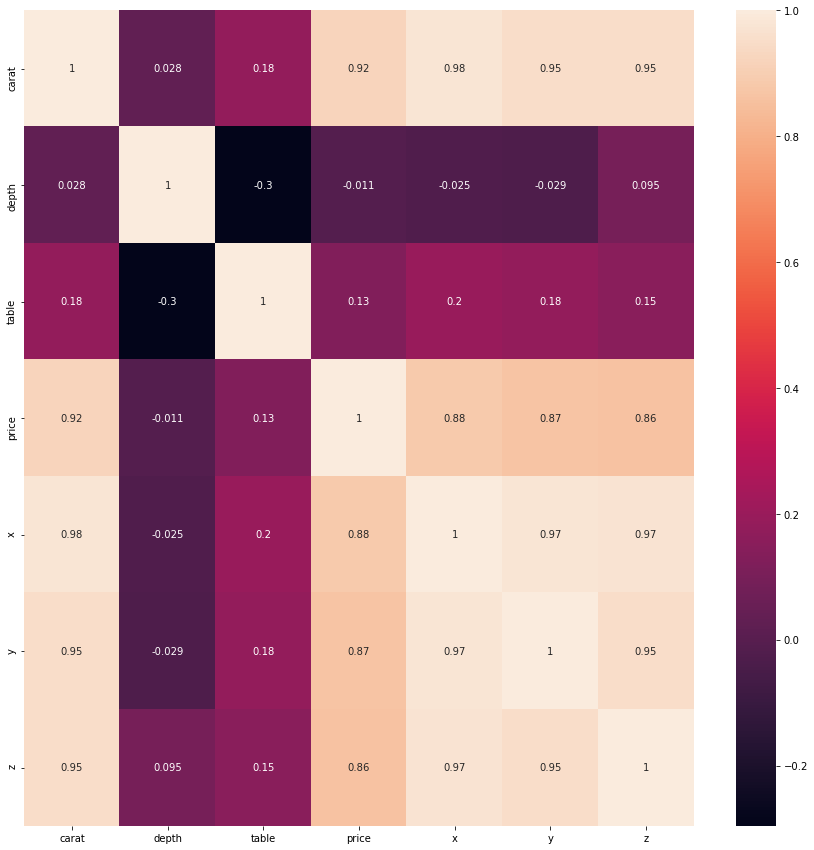

In [21]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

# Observation :
We can observe that the Price of the Diamond is highly correlated to Carat, and its Dimensions(x, y, z)

As the Dimensions increases, Obviously the Prices Rises as more and more Natural Resources are Utilised.

#  order of "Price" column

In [22]:
df2 = df.iloc[:,[0,1,2,3,4,5,7,8,9,6]]

# Detect Outlier

In [23]:
col_name = df2.select_dtypes(include=['int','float']).columns


for i in col_name:
  mean = df2[i].mean()
  med =  df2[i].median()
  print(f'Mean for {i} is {mean}')
  print(f'Median for {i} is {med}')

Mean for carat is 0.7979397478679852
Median for carat is 0.7
Mean for depth is 61.74940489432624
Median for depth is 61.8
Mean for table is 57.45718390804603
Median for table is 57.0
Mean for x is 5.731157211716609
Median for x is 5.7
Mean for y is 5.734525954764462
Median for y is 5.71
Mean for z is 3.5387337782723316
Median for z is 3.53


# Treat Outliers

In [24]:
def outliers(col_name):
  Q1 = np.percentile(df2[col_name], 25,
                   interpolation = 'midpoint')
 
  Q3 = np.percentile(df2[col_name], 75,
                   interpolation = 'midpoint')
  IQR = Q3 - Q1

  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  df2.drop(df2[(df2[col_name] > upper) | (df2[col_name] < lower)].index, inplace=True)

In [25]:
X = df2.iloc[:,:9]
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape ,X_test.shape, y_train.shape, y_test.shape


((40455, 9), (13485, 9), (40455,), (13485,))

# Check Categorical data

In [26]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,cut,color,clarity
25755,Good,E,VS2
52113,Very Good,G,SI1
40442,Good,E,VS1
11368,Ideal,I,VS1
18170,Premium,G,VVS2


# Check Numerical Columns

In [27]:
# Importing LabelEncoder Module
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['cut']=le.fit_transform(X_train['cut'])
X_train['color']=le.fit_transform(X_train['color'])
X_train['clarity']=le.fit_transform(X_train['clarity'])


In [28]:

X_test['cut']=le.fit_transform(X_test['cut'])
X_test['color']=le.fit_transform(X_test['color'])
X_test['clarity']=le.fit_transform(X_test['clarity'])

# Standardization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),
                                columns = X_train.columns,
                                index = X_train.index)
X_train_transformed.head()

,carat,cut,color,clarity,depth,table,x,y,z
25755,1.497167,-1.513334,-0.939859,0.672172,0.593356,1.133865,1.325265,1.377565,1.410365
52113,-0.101653,1.408815,0.235401,-1.068757,0.383982,0.687726,0.034389,0.067842,0.099479
40442,-0.837951,-1.513334,-0.939859,0.091863,1.430851,-0.204552,-0.900384,-0.930043,-0.760350
11368,0.508423,-0.539285,1.410660,0.091863,0.802729,-6.450501,0.639765,0.602423,0.705588
18170,0.445312,0.434765,0.235401,1.832792,-1.639964,0.241587,0.710986,0.691520,0.550536


In [30]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test),
                               columns = X_test.columns,
                               index = X_test.index)
X_test_transformed.head()

,carat,cut,color,clarity,depth,table,x,y,z
6024,0.424275,-1.513334,-1.527489,-0.488447,1.779807,-1.989109,0.541837,0.495507,0.733779
27889,-1.048322,-0.539285,0.823030,1.252482,-0.383722,-0.204552,-1.274293,-1.197333,-1.239598
44305,-0.564469,0.434765,-0.939859,0.672172,-0.244139,0.241587,-0.437449,-0.484559,-0.478439
37326,-0.648617,0.434765,-0.352229,-0.488447,-0.662886,1.133865,-0.544280,-0.618204,-0.633490
15177,0.445312,0.434765,-0.352229,0.672172,0.453773,0.241587,0.621960,0.557874,0.635110


In [31]:
!pip install mlflow --user
import mlflow

  Using cached pywin32-304-cp38-cp38-win_amd64.whl (12.3 MB)


In [41]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("Diamond Price Prediction")

2022/10/01 19:30:07 INFO mlflow.tracking.fluent: Experiment with name 'Diamond Price Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='./mlruns/1', creation_time=1664632807657, experiment_id='1', last_update_time=1664632807657, lifecycle_stage='active', name='Diamond Price Prediction', tags={}>

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [43]:
import pickle
from pickle import dump
dump(scaler, open('models/standard_scaler.pkl', 'wb'))

In [44]:
#Experiment 1 - Training KNN Classifier
with mlflow.start_run():
    
    mlflow.set_tag('dev', 'Rinku Soni')
    mlflow.set_tag('algo', 'KNN')
    mlflow.log_param('data-path', 'data/diamonds.csv')
    
    knn_regressor = KNeighborsRegressor()
    knn_regressor.fit(X_train_transformed, y_train)
    
    y_test_pred = knn_regressor.predict(X_test_transformed)
    
    mae = metrics.mean_absolute_error(y_test, y_test_pred)
    mse = metrics.mean_squared_error(y_test, y_test_pred)
    msqe = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    mlflow.log_metric('mean_ab_error', mae)
    mlflow.log_metric('mean_sqr_error', mse)
    mlflow.log_metric('mean_srt_error', msqe)
    
    mlflow.sklearn.log_model(knn_regressor, artifact_path='models')
    mlflow.log_artifact('models/standard_scaler.pkl')

In [45]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  411.7661253244346
Mean Squared Error:  686410.3354987024
Root Mean Squared Error:  828.4988445970836


In [46]:
#Experiment 2: Random Forest
from sklearn.ensemble import RandomForestRegressor
with mlflow.start_run():
    mlflow.set_tag('dev', 'Rinku Soni')
    mlflow.set_tag('algo', 'Random Forest')
    mlflow.log_param('data-path', 'data/diamonds.csv')
    
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train_transformed, y_train, y_train)
    
    y_test_pred = rf_regressor.predict(X_test_transformed)

    mae = metrics.mean_absolute_error(y_test, y_test_pred)
    mse = metrics.mean_squared_error(y_test, y_test_pred)
    msqe = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    mlflow.log_metric('mean_ab_error', mae)
    mlflow.log_metric('mean_sqr_error', mse)
    mlflow.log_metric('mean_srt_error', msqe)
    
    mlflow.sklearn.log_model(rf_regressor, artifact_path='models')
    mlflow.log_artifact('models/standard_scaler.pkl')

In [47]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  273.7975161795798
Mean Squared Error:  308573.2951991402
Root Mean Squared Error:  555.4937400179593


In [48]:
with mlflow.start_run():
    mlflow.set_tag('dev', 'Rinku Soni')
    mlflow.set_tag('algo', 'Decision Tree')
    mlflow.log_param('data-path', 'data/diamonds.csv')

    dt_regressor = DecisionTreeRegressor()
    dt_regressor.fit(X_train_transformed, y_train)

    y_test_pred = dt_regressor.predict(X_test_transformed)
    
    mae = metrics.mean_absolute_error(y_test, y_test_pred)
    mse = metrics.mean_squared_error(y_test, y_test_pred)
    msqe = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    mlflow.log_metric('mean_ab_error', mae)
    mlflow.log_metric('mean_sqr_error', mse)
    mlflow.log_metric('mean_srt_error', msqe)
    
    mlflow.sklearn.log_model(dt_regressor, artifact_path='models')
    mlflow.log_artifact('models/standard_scaler.pkl')

In [49]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  366.88787541713015
Mean Squared Error:  573210.783277716
Root Mean Squared Error:  757.1068506345165
